# Driving

In [14]:
from astropy import units
import ipywidgets as widgets
from IPython.display import display
from matplotlib import pyplot as plt
import pandas

from dpd.driving import Route, Schedule, Trip, Vehicle

units.imperial.enable()

In [15]:
trains = pandas.read_csv(
    "https://raw.githubusercontent.com/davidbailey/Notes/trunk/Trains.csv"
)
trains.index = trains.Manufacturer + " " + trains.Model
trains.sort_index(inplace=True)


def vehicle_dropdown_observer(value):
    global vehicle
    vehicle = Vehicle(
        trains["Maximum speed"][value.new],
        trains["Acceleration"][value.new],
        trains["Deceleration"][value.new],
    )


vehicle_widget = widgets.Dropdown(
    options=trains.index,
    description="Vehicle",
    value="Kinkisharyo P3010",
)
vehicle_widget.observe(vehicle_dropdown_observer, names="value")
display(vehicle_widget)

relations = {
    "expo_line_west": 2351006,
    "blue_line_north": 2351005,
    "c_line_east": 2377889,
    "s1_ost_flug": 1773071,
    "bart_red_south": 2851509,
    "caltrain_local": 2768041,
    "san_bernardino_line": 1287719,
    "orange_county_line": 2812899,
    "ca_hsr": 7739486,
}


def relation_dropdown_observer(value):
    global relation
    relation = value.new


relation_widget = widgets.Dropdown(
    options=relations,
    description="Route",
    value=1287719,
)
relation_widget.observe(relation_dropdown_observer, names="value")
display(relation_widget)

Dropdown(description='Vehicle', index=7, options=('Alstom AGV', 'Alstom Avelia Euroduplex', 'Alstom Coradia', …

Dropdown(description='Route', index=6, options={'expo_line_west': 2351006, 'blue_line_north': 2351005, 'c_line…

In [16]:
vehicle = Vehicle(
    55 * units.imperial.mile / units.hour,
    0.45 * units.meter / (units.second * units.second),
    -0.45 * units.meter / (units.second * units.second),
)

relation = 1287719

if relation == relations["bart_red_south"]:
    gague = 1.676 * units.meter
else:
    gague = 1.435 * units.meter

route = Route.from_osm_relation(relation=relation, gague=gague)

for name in [
    "San Bernardino–Downtown",
    "Rialto",
    "Fontana",
    "Upland",
    "Claremont",
    "Pomona–North",
    "Baldwin Park",
    "El Monte",
]:
    route.remove_stop(name)

In [17]:
route.stops

,geometry,name
62,POINT (-117.30941 34.10442),San Bernardino Depot
261,POINT (-117.55880 34.09192),Rancho Cucamonga
352,POINT (-117.69469 34.09390),Montclair
512,POINT (-117.88803 34.09206),Covina
802,POINT (-118.16815 34.06266),Cal State LA
1015,POINT (-118.23438 34.05434),Los Angeles Union Station


In [18]:
trip = route.trip(vehicle, 45 * units.second)

/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [19]:
trip

,total_time,total_distance,name,geometry
timedelta,,,,
0 days 00:00:00,0.0 s,0.0 m,San Bernardino Depot,POINT (-1851634.716 -483979.286)
0 days 00:00:45,45.0 s,0.0 m,San Bernardino Depot,POINT (-1851634.716 -483979.286)
0 days 00:01:08.763675,68.76367507023403 s,127.06025688982402 m,NaN,POINT (-1851758.567 -483950.907)
0 days 00:01:16.453584,76.45358353809242 s,222.59878141224567 m,NaN,POINT (-1851851.794 -483930.018)
0 days 00:01:17.462641,77.46264100605367 s,237.11018874478154 m,NaN,POINT (-1851865.949 -483926.825)
...,...,...,...,...
0 days 01:08:31.991430,4111.991429673721 s,87029.18793023335 m,NaN,POINT (-1932061.948 -470424.365)
0 days 01:08:32.082235,4112.082235423444 s,87031.02940074189 m,NaN,POINT (-1932063.323 -470423.141)
0 days 01:09:17.192590,4157.192589560408 s,87488.8918120734 m,NaN,POINT (-1932248.712 -470046.708)


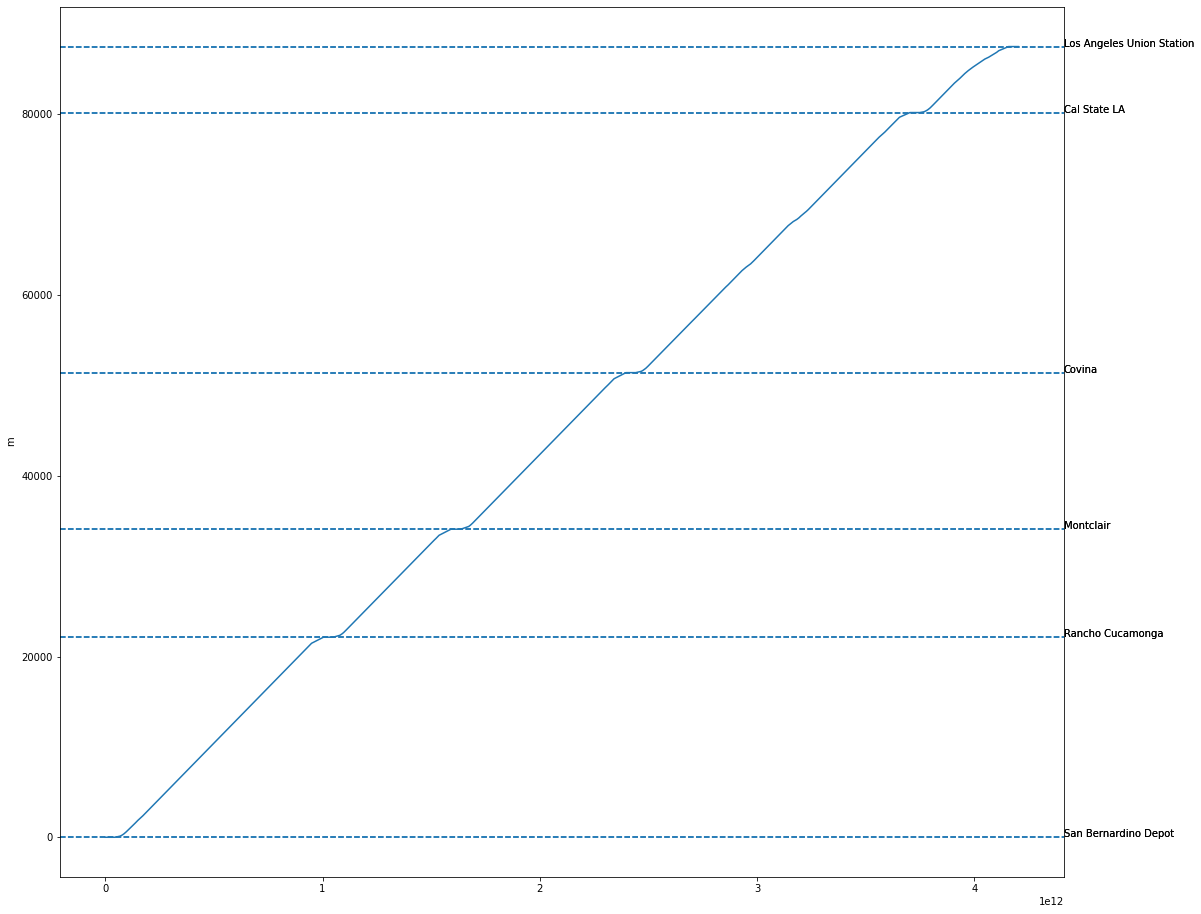

In [6]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
trip.plot_schedule(ax=ax)
plt.show()

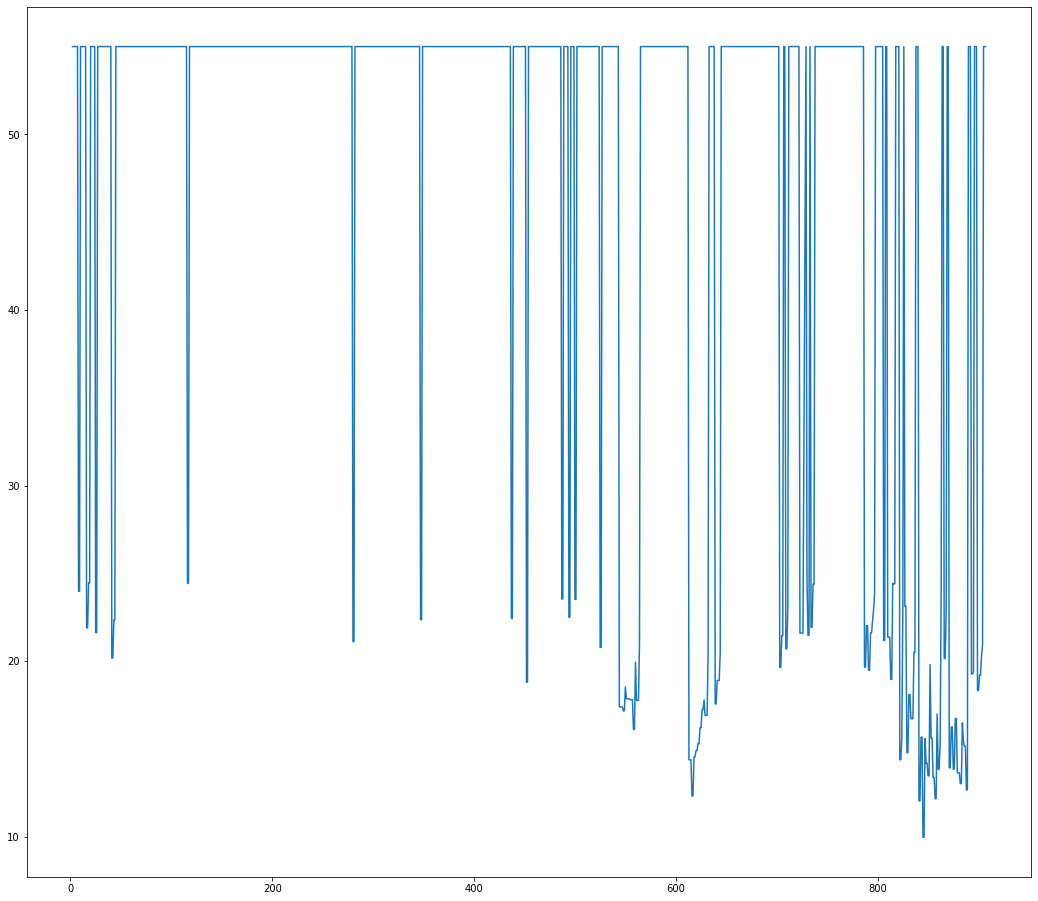

In [7]:
drive = route.drive(vehicle, 45 * units.second)

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
drive.speed_limit.dropna().map(lambda x: x.value).plot(ax=ax)
plt.show()

In [8]:
import folium
from pyproj import CRS
from shapely.geometry import Point

from dpd.geometry import GeometricDict
from dpd.driving import Stop, Section

gd = GeometricDict(
    {
        "stop1": Stop(Point(-118.38532, 33.90806)),
        "stop2": Stop(Point(-118.39603, 33.89901)),
        "stop3": Stop(Point(-118.39599, 33.88737)),
        "stop4": Stop(Point(-118.39302, 33.86479)),
        "stop5": Stop(Point(-118.39017, 33.85437)),
        "stop6": Stop(Point(-118.39168, 33.84353)),
    },
    crs=CRS.from_epsg(4326),
)

sections = []
for i in range(len(gd) - 1):
    sections.append(
        Section(
            list(gd.values())[i].geometry, list(gd.values())[i + 1].geometry
        ).geometry
    )

route = Route.from_ways(sections, gd.crs)

for stop in gd:
    route.add_stop(gd[stop].geometry, stop)

trip = route.trip(vehicle, 45 * units.second)
trip.stops

/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


timedelta            total_time  \
Stop  Arriva/Departure                                                
stop1 Arrival                 0 days 00:00:00                 0.0 s   
      Departure               0 days 00:00:45                45.0 s   
stop2 Arrival          0 days 00:02:37.181532  157.18153159033312 s   
      Departure        0 days 00:03:22.181532  202.18153159033312 s   
stop3 Arrival          0 days 00:05:12.053306   312.0533055038973 s   
      Departure        0 days 00:05:57.053306   357.0533055038973 s   
stop4 Arrival          0 days 00:08:39.357697   519.3576969653953 s   
      Departure        0 days 00:09:24.357697   564.3576969653953 s   
stop5 Arrival          0 days 00:11:09.394768   669.3947680671639 s   
      Departure        0 days 00:11:54.394768   714.3947680671639 s   
stop6 Arrival          0 days 00:13:40.707541   820.7075406370549 s   
      Departure        0 days 00:14:25.707541   865.7075406370549 s   

                              total_distance   name  \
Stop  Arriva/Departure                                
stop1 Arrival                          0.0 m  stop1   
      Departure                        0.0 m  stop1   
stop2 Arrival           1414.8288560956162 m  stop2   
      Departure         1414.8288560956162 m  stop2   
stop3 Arrival            2772.867238240979 m  stop3   
      Departure          2772.867238240979 m  stop3   
stop4 Arrival            5420.076874560901 m  stop4   
      Departure          5420.076874560901 m  stop4   
stop5 Arrival           6661.2653339451745 m  stop5   
      Departure         6661.2653339451745 m  stop5   
stop6 Arrival            7932.785965238629 m  stop6   
      Departure          7932.785965238629 m  stop6   

                                                geometry  
Stop  Arriva/Departure                                    
stop1 Arrival           POINT (-1949962.848 -483894.898)  
      Departure         POINT (-1949962.848 -483894.898)  
stop2 Arrival           POINT (-1951125.506 -484701.104)  
      Departure         POINT (-1951125.506 -484701.104)  
stop3 Arrival           POINT (-1951439.942 -486022.239)  
      Departure         POINT (-1951439.942 -486022.239)  
stop4 Arrival           POINT (-1951802.479 -488644.507)  
      Departure         POINT (-1951802.479 -488644.507)  
stop5 Arrival           POINT (-1951843.151 -489885.029)  
      Departure         POINT (-1951843.151 -489885.029)  
stop6 Arrival           POINT (-1952268.249 -491083.384)  
      Departure         POINT (-1952268.249 -491083.384)

In [9]:
import folium
from dpd.modeling import Zones

zones = Zones.from_uscensus("06", "2017")

folium_map = folium.Map(
    (route.way.centroid.coords[0][1], route.way.centroid.coords[0][0])
)
route.plot_folium(folium_map)
zones.plot_density(folium_map)
# folium_map

/usr/local/lib/python3.9/site-packages/dpd/uscensus/get_uscensus_data.py:31: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  dataframe = pandas.DataFrame(


In [10]:
accessibility = zones.accessibility(route)

  0%|          | 0/41 [00:00<?, ?it/s]


TypeError: accessibility() missing 1 required positional argument: 'mode'

In [ ]:
accessibility

In [ ]:
accessibility[
    accessibility["time"] < (15 * units.minute).to(units.second).value
].groupby("stop").sum()["population"].plot(
    kind="bar",
    title="Population within 15 minute walk of each stop",
    ylabel="Population",
)

In [11]:
trip = route.trip(vehicle, 45 * units.second)
schedule = Schedule.from_trip(trip)

trip_reversed = route.reversed.trip(vehicle, 45 * units.second)
schedule_reversed = Schedule.from_trip(trip_reversed)
schedule_reversed.reverse_distance()

/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


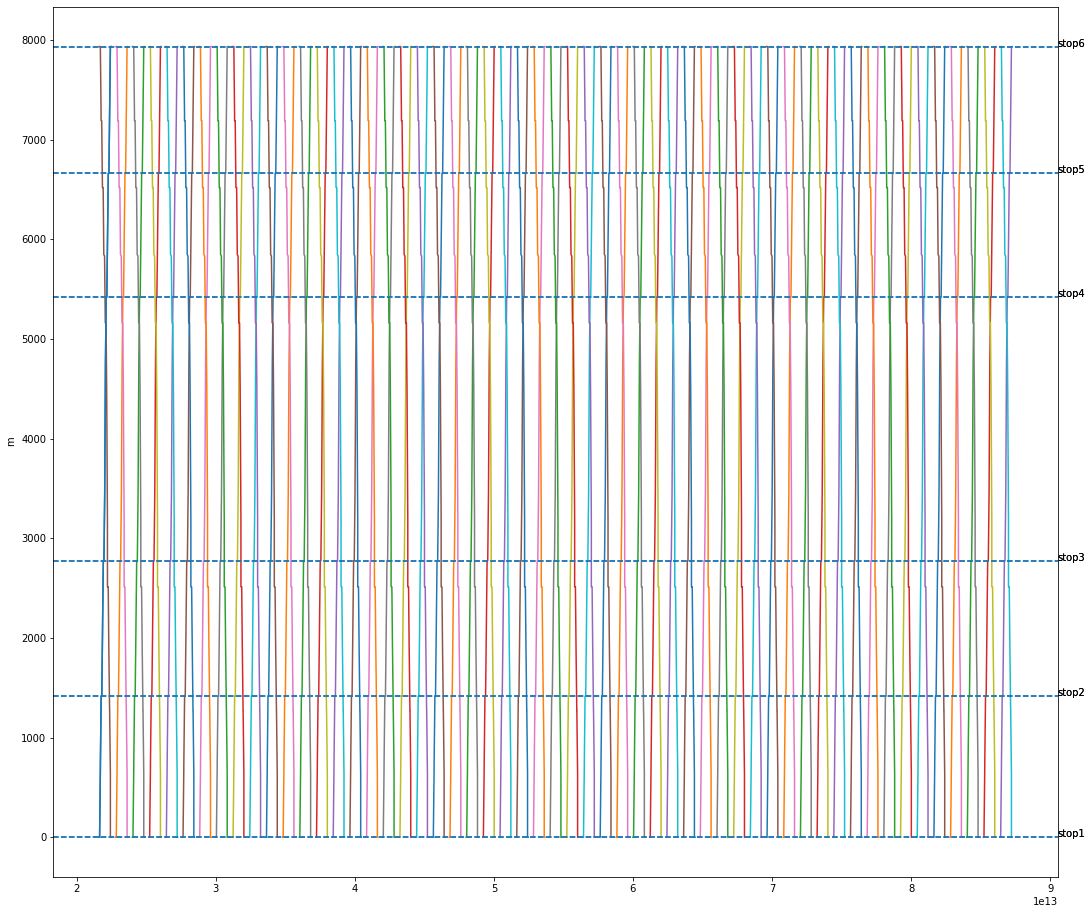

In [12]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
schedule.plot_schedule(ax=ax)
schedule_reversed.plot_schedule(ax=ax)
schedule.trips[list(schedule.trips.keys())[0]].plot_schedule(ax=ax)  # to add labels
plt.show()

In [13]:
schedule.schedule[schedule.schedule.index.isin(["Departure"], level=1)].applymap(
    lambda x: x.round("s")
)

,,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Stop,Arriva/Departure,,,,,,,,,,,,,,,,,,,,,
stop1,Departure,0 days 06:00:45,0 days 06:20:45,0 days 06:40:45,0 days 07:00:45,0 days 07:20:45,0 days 07:40:45,0 days 08:00:45,0 days 08:20:45,0 days 08:40:45,0 days 09:00:45,...,0 days 21:00:45,0 days 21:20:45,0 days 21:40:45,0 days 22:00:45,0 days 22:20:45,0 days 22:40:45,0 days 23:00:45,0 days 23:20:45,0 days 23:40:45,1 days 00:00:45
stop2,Departure,0 days 06:03:22,0 days 06:23:22,0 days 06:43:22,0 days 07:03:22,0 days 07:23:22,0 days 07:43:22,0 days 08:03:22,0 days 08:23:22,0 days 08:43:22,0 days 09:03:22,...,0 days 21:03:22,0 days 21:23:22,0 days 21:43:22,0 days 22:03:22,0 days 22:23:22,0 days 22:43:22,0 days 23:03:22,0 days 23:23:22,0 days 23:43:22,1 days 00:03:22
stop3,Departure,0 days 06:05:57,0 days 06:25:57,0 days 06:45:57,0 days 07:05:57,0 days 07:25:57,0 days 07:45:57,0 days 08:05:57,0 days 08:25:57,0 days 08:45:57,0 days 09:05:57,...,0 days 21:05:57,0 days 21:25:57,0 days 21:45:57,0 days 22:05:57,0 days 22:25:57,0 days 22:45:57,0 days 23:05:57,0 days 23:25:57,0 days 23:45:57,1 days 00:05:57
stop4,Departure,0 days 06:09:24,0 days 06:29:24,0 days 06:49:24,0 days 07:09:24,0 days 07:29:24,0 days 07:49:24,0 days 08:09:24,0 days 08:29:24,0 days 08:49:24,0 days 09:09:24,...,0 days 21:09:24,0 days 21:29:24,0 days 21:49:24,0 days 22:09:24,0 days 22:29:24,0 days 22:49:24,0 days 23:09:24,0 days 23:29:24,0 days 23:49:24,1 days 00:09:24
stop5,Departure,0 days 06:11:54,0 days 06:31:54,0 days 06:51:54,0 days 07:11:54,0 days 07:31:54,0 days 07:51:54,0 days 08:11:54,0 days 08:31:54,0 days 08:51:54,0 days 09:11:54,...,0 days 21:11:54,0 days 21:31:54,0 days 21:51:54,0 days 22:11:54,0 days 22:31:54,0 days 22:51:54,0 days 23:11:54,0 days 23:31:54,0 days 23:51:54,1 days 00:11:54
stop6,Departure,0 days 06:14:26,0 days 06:34:26,0 days 06:54:26,0 days 07:14:26,0 days 07:34:26,0 days 07:54:26,0 days 08:14:26,0 days 08:34:26,0 days 08:54:26,0 days 09:14:26,...,0 days 21:14:26,0 days 21:34:26,0 days 21:54:26,0 days 22:14:26,0 days 22:34:26,0 days 22:54:26,0 days 23:14:26,0 days 23:34:26,0 days 23:54:26,1 days 00:14:26


In [11]:
import gtfs_kit

feed = gtfs_kit.read_feed(
    "http://www.bart.gov/dev/schedules/google_transit.zip", dist_units="mi"
)

trip = Trip.from_gtfs(feed, trip_id="1001860")
from astropy import units

units.imperial.enable()
trip["total_distance"] = trip.total_distance.map(
    lambda x: (x.value * units.imperial.foot).to(units.meter)
)

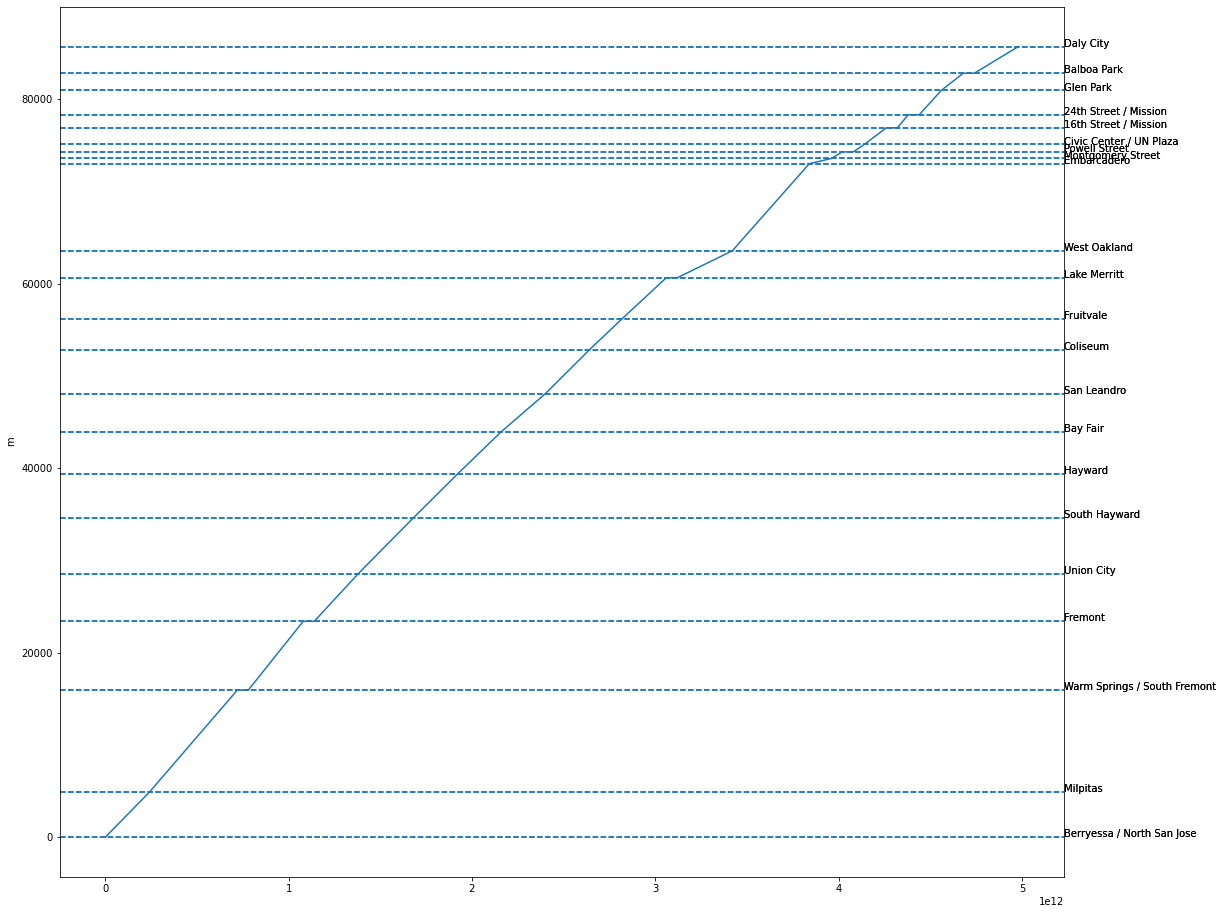

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
trip.plot_schedule(ax=ax)
plt.show()

In [3]:
schedule = Schedule.from_gtfs(feed, route_id="6", direction_id=0)
schedule_reversed = Schedule.from_gtfs(feed, route_id="5", direction_id=1)

In [4]:
from astropy import units

units.imperial.enable()
for trip_id in schedule.trips:
    trip = schedule.trips[trip_id]
    trip["total_distance"] = trip.total_distance.map(
        lambda x: (x.value * units.imperial.foot).to(units.meter)
    )
for trip_id in schedule_reversed.trips:
    trip = schedule_reversed.trips[trip_id]
    trip["total_distance"] = trip.total_distance.map(
        lambda x: (x.value * units.imperial.foot).to(units.meter)
    )

In [5]:
schedule_reversed.reverse_distance()

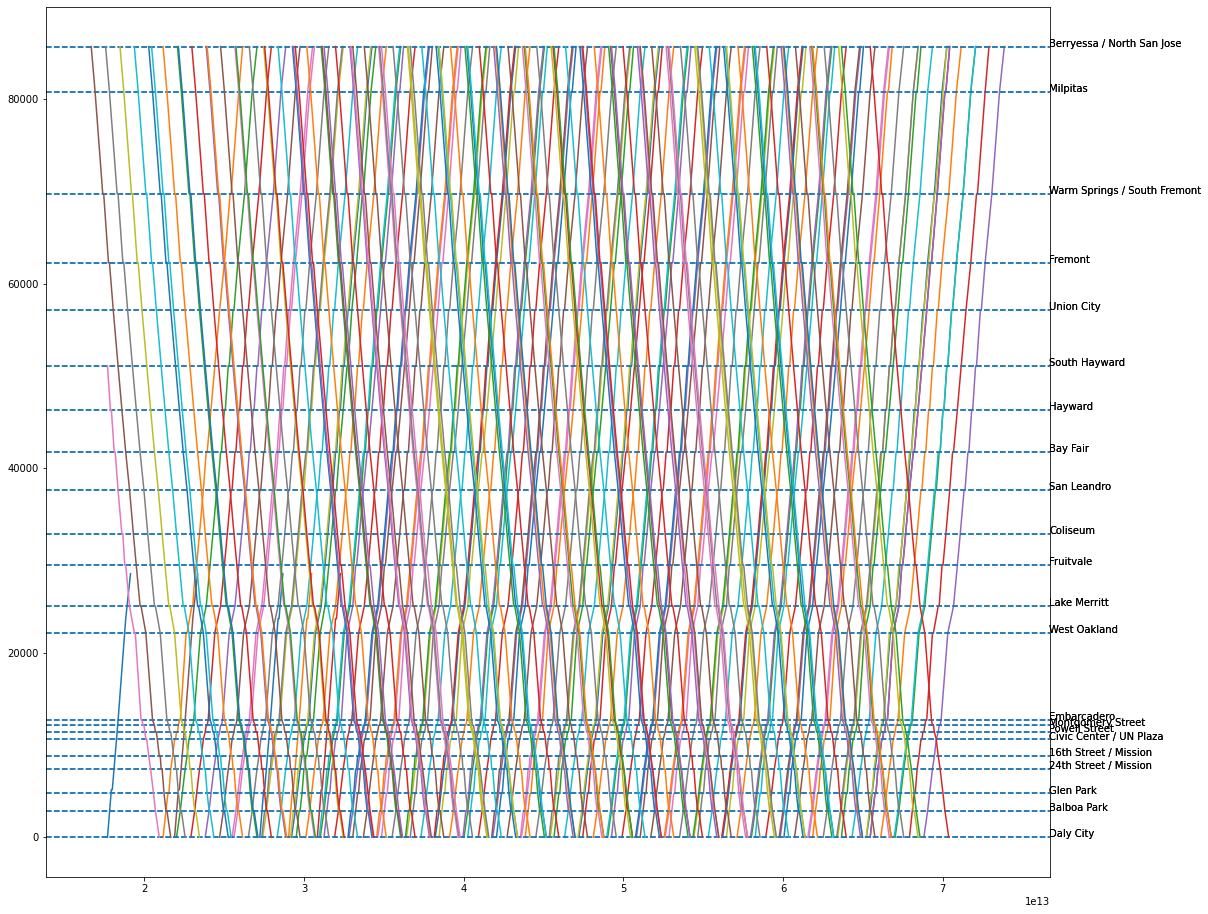

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
schedule.plot_schedule(ax=ax)
schedule.trips[list(schedule.trips.keys())[-1]].plot_schedule(ax=ax)  # to add labels
schedule_reversed.plot_schedule(ax=ax)
plt.show()

In [9]:
schedule_reversed.schedule

1001860         1009562  \
Stop                         Arriva/Departure                                   
Berryessa / North San Jose   Arrival          0 days 04:38:00             NaT   
                             Departure        0 days 04:38:00             NaT   
Milpitas                     Arrival          0 days 04:42:00             NaT   
                             Departure        0 days 04:42:00             NaT   
Warm Springs / South Fremont Arrival          0 days 04:50:00             NaT   
                             Departure        0 days 04:51:00             NaT   
Fremont                      Arrival          0 days 04:56:00             NaT   
                             Departure        0 days 04:57:00             NaT   
Union City                   Arrival          0 days 05:01:00             NaT   
                             Departure        0 days 05:01:00             NaT   
South Hayward                Arrival          0 days 05:06:00 0 days 04:55:00   
                             Departure        0 days 05:06:00 0 days 04:55:00   
Hayward                      Arrival          0 days 05:10:00 0 days 04:58:00   
                             Departure        0 days 05:10:00 0 days 04:59:00   
Bay Fair                     Arrival          0 days 05:14:00 0 days 05:02:00   
                             Departure        0 days 05:14:00 0 days 05:03:00   
San Leandro                  Arrival          0 days 05:18:00 0 days 05:06:00   
                             Departure        0 days 05:18:00 0 days 05:06:00   
Coliseum                     Arrival          0 days 05:22:00 0 days 05:10:00   
                             Departure        0 days 05:22:00 0 days 05:11:00   
Fruitvale                    Arrival          0 days 05:25:00 0 days 05:13:00   
                             Departure        0 days 05:25:00 0 days 05:14:00   
Lake Merritt                 Arrival          0 days 05:29:00 0 days 05:18:00   
                             Departure        0 days 05:30:00 0 days 05:18:00   
West Oakland                 Arrival          0 days 05:35:00 0 days 05:23:00   
                             Departure        0 days 05:35:00 0 days 05:24:00   
Embarcadero                  Arrival          0 days 05:42:00 0 days 05:30:00   
                             Departure        0 days 05:42:00 0 days 05:31:00   
Montgomery Street            Arrival          0 days 05:44:00 0 days 05:32:00   
                             Departure        0 days 05:44:00 0 days 05:33:00   
Powell Street                Arrival          0 days 05:45:00 0 days 05:34:00   
                             Departure        0 days 05:46:00 0 days 05:34:00   
Civic Center / UN Plaza      Arrival          0 days 05:47:00 0 days 05:35:00   
                             Departure        0 days 05:47:00 0 days 05:36:00   
16th Street / Mission        Arrival          0 days 05:49:00 0 days 05:38:00   
                             Departure        0 days 05:50:00 0 days 05:38:00   
24th Street / Mission        Arrival          0 days 05:51:00 0 days 05:40:00   
                             Departure        0 days 05:52:00 0 days 05:40:00   
Glen Park                    Arrival          0 days 05:54:00 0 days 05:43:00   
                             Departure        0 days 05:54:00 0 days 05:43:00   
Balboa Park                  Arrival          0 days 05:56:00 0 days 05:45:00   
                             Departure        0 days 05:57:00 0 days 05:45:00   
Daly City                    Arrival          0 days 06:01:00 0 days 05:49:00   
                             Departure        0 days 06:01:00 0 days 05:49:00   

                                                      1001808         1001809  \
Stop                         Arriva/Departure                                   
Berryessa / North San Jose   Arrival          0 days 04:53:00 0 days 05:08:00   
                             Departure        0 days 04:53:00 0 days 05:08:00   
Mil